In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, Birch, MeanShift, SpectralClustering, OPTICS, AffinityPropagation
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.mixture import GaussianMixture
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import librosa
import matplotlib.pyplot as plt
from librosa.feature.rhythm import tempo as compute_tempo_function
from scipy.stats import skew, kurtosis
from tqdm import tqdm

In [2]:
def aggregate_mfcc_selective(mfcc_data):
    # mfcc_selected = mfcc_data[:, :] 
    # select rows 1, 2, and 3 from mfcc_data
    mfcc_selected = mfcc_data[0:3, :]
    
    mfcc_mean = np.mean(mfcc_selected, axis=1)
    mfcc_std = np.std(mfcc_selected, axis=1)
    mfcc_max = np.max(mfcc_selected, axis=1)
    mfcc_min = np.min(mfcc_selected, axis=1)
    
    features = np.concatenate([mfcc_mean, mfcc_std, mfcc_max, mfcc_min])
    return features

def aggregate_mfcc_selective2(mfcc_data):
    mfcc_selected = mfcc_data[0:20, :] 
    
    mfcc_mean = np.mean(mfcc_selected, axis=1)
    mfcc_std = np.std(mfcc_selected, axis=1)
    mfcc_max = np.max(mfcc_selected, axis=1)
    mfcc_min = np.min(mfcc_selected, axis=1)
    
    features = np.concatenate([mfcc_mean, mfcc_std, mfcc_max, mfcc_min])
    return features


In [3]:
DATA_DIR = './data-v2' #update with where you stored the file
DATA2_DIR = './data-v2-copy'

In [4]:
# Initialize lists to store features, file names, and labels
mfcc_all_songs = []
file_names = []
generated_features = []
labels = []

total_songs = len(os.listdir(DATA_DIR))
idx = 1

# Iterate over all files in the specified directory
for file_name in os.listdir(DATA_DIR):
    file_path = os.path.join(DATA_DIR, file_name)
    file_path2 = os.path.join(DATA2_DIR, file_name)
    mfcc_data = pd.read_csv(file_path, header=None).values
    mfcc_data = mfcc_data[:20]
    mfcc_data2 = pd.read_csv(file_path2, header=None).values
    # Compute aggregated MFCC features
    aggregated_features = aggregate_mfcc_selective(mfcc_data)
    aggregated_features2 = aggregate_mfcc_selective2(mfcc_data2)

    skewness = skew(mfcc_data, axis=1)
    kurt = kurtosis(mfcc_data, axis=1)
    range_max_min = np.ptp(mfcc_data, axis=1)

    total_energy = np.sum(mfcc_data ** 2, axis=1)
    energy_entropy = -np.sum(mfcc_data ** 2 * np.log(mfcc_data ** 2 + 1e-10), axis=1)
    q25 = np.percentile(mfcc_data, 25, axis=1)
    q75 = np.percentile(mfcc_data, 75, axis=1)

    delta_mfcc = librosa.feature.delta(mfcc_data, order=1)
    delta_delta_mfcc = librosa.feature.delta(mfcc_data, order=2)
    

    delta_mean = np.mean(delta_mfcc, axis=1)
    delta_std = np.std(delta_mfcc, axis=1)
    delta_max = np.max(delta_mfcc, axis=1)
    delta_min = np.min(delta_mfcc, axis=1)
    delta_skew = skew(librosa.feature.delta(mfcc_data), axis=1)
    delta_kurtosis = kurtosis(librosa.feature.delta(mfcc_data), axis=1)
    delta_range = np.ptp(librosa.feature.delta(mfcc_data), axis=1)
    delta_total_energy = np.sum(librosa.feature.delta(mfcc_data) ** 2, axis=1)
    delta_energy_entropy = -np.sum(librosa.feature.delta(mfcc_data) ** 2 * np.log(librosa.feature.delta(mfcc_data) ** 2 + 1e-10), axis=1)
    delta_q25 = np.percentile(delta_mfcc, 25, axis=1)
    delta_q75 = np.percentile(delta_mfcc, 75, axis=1)
        
    delta_delta_mean = np.mean(delta_delta_mfcc, axis=1)
    delta_delta_std = np.std(delta_delta_mfcc, axis=1)
    delta_delta_max = np.max(delta_delta_mfcc, axis=1)
    delta_delta_min = np.min(delta_delta_mfcc, axis=1)
    delta_delta_skew = skew(librosa.feature.delta(delta_delta_mfcc, order=2), axis=1)
    delta_delta_kurtosis = kurtosis(librosa.feature.delta(delta_delta_mfcc, order=2), axis=1)
    delta_delta_range = np.ptp(librosa.feature.delta(delta_delta_mfcc, order=2), axis=1)
    delta_delta_total_energy = np.sum(librosa.feature.delta(delta_delta_mfcc, order=2) ** 2, axis=1)
    delta_delta_energy_entropy = -np.sum(librosa.feature.delta(delta_delta_mfcc, order=2) 
                                            ** 2 * np.log(librosa.feature.delta(delta_delta_mfcc, order=2) ** 2 + 1e-10), axis=1)
    delta_delta_q25 = np.percentile(delta_delta_mfcc, 25, axis=1)
    delta_delta_q75 = np.percentile(delta_delta_mfcc, 75, axis=1)


    delta_mfcc2 = librosa.feature.delta(mfcc_data2, order=1)
    delta_delta_mfcc2 = librosa.feature.delta(mfcc_data2, order=2)
    delta_mean2 = np.mean(delta_mfcc2, axis=1)
    delta_std2 = np.std(delta_mfcc2, axis=1)
    delta_max2 = np.max(delta_mfcc2, axis=1)
    delta_min2 = np.min(delta_mfcc2, axis=1)
    delta_delta_mean2 = np.mean(delta_delta_mfcc2, axis=1)
    delta_delta_std2 = np.std(delta_delta_mfcc2, axis=1)
    delta_delta_max2 = np.max(delta_delta_mfcc2, axis=1)
    delta_delta_min2 = np.min(delta_delta_mfcc2, axis=1)
    delta_delta_range2 = np.ptp(delta_delta_mfcc2, axis=1)  
    delta_delta_total_energy2 = np.sum(librosa.feature.delta(delta_delta_mfcc2, order=2) ** 2, axis=1)
    delta_delta_energy_entropy2 = -np.sum(librosa.feature.delta(delta_delta_mfcc2, order=2) 
                                            ** 2 * np.log(librosa.feature.delta(delta_delta_mfcc2, order=2) ** 2 + 1e-10), axis=1)
    delta_delta_q252 = np.percentile(delta_delta_mfcc2, 25, axis=1)
    delta_delta_q752 = np.percentile(delta_delta_mfcc2, 75, axis=1)

    # PCA_mfcc = PCA(n_components=5)
    # PCA_mfcc.fit(mfcc_data.T)
    # PCA_mfcc_features = PCA_mfcc.components_.flatten()

    # Compile all features into a single vector
    features = np.concatenate([
        aggregated_features.flatten(),
        aggregated_features2.flatten(),
        range_max_min.flatten(),
        skewness.flatten(),
        kurt.flatten(),
        total_energy.flatten(),
        energy_entropy.flatten(),
        q25.flatten(),
        q75.flatten(),
        
        delta_mean.flatten(),
        delta_std.flatten(),
        delta_max.flatten(),
        delta_min.flatten(),
        delta_skew.flatten(),
        delta_kurtosis.flatten(),
        delta_range.flatten(),
        delta_total_energy.flatten(),
        delta_energy_entropy.flatten(),
        delta_q25.flatten(),
        delta_q75.flatten(),
        
        delta_delta_mean.flatten(),
        delta_delta_std.flatten(),
        delta_delta_max.flatten(),
        delta_delta_min.flatten(),
        delta_delta_skew.flatten(),
        delta_delta_kurtosis.flatten(),
        delta_delta_range.flatten(),
        delta_delta_total_energy.flatten(),
        delta_delta_energy_entropy.flatten(),
        delta_delta_q25.flatten(),
        delta_delta_q75.flatten(),
        
        delta_mean2.flatten(),
        delta_std2.flatten(),
        delta_max2.flatten(),
        delta_min2.flatten(),
        delta_delta_mean2.flatten(),
        delta_delta_std2.flatten(),
        delta_delta_max2.flatten(),
        delta_delta_min2.flatten(),
        delta_delta_total_energy2.flatten(),
        delta_delta_energy_entropy2.flatten(),
        delta_delta_q252.flatten(),
        delta_delta_q752.flatten(),

        # PCA_mfcc_features.flatten(),
    ])

    print(f'Processed {file_name}')
        
    generated_features.append(features)  # Append the features for this song
    file_names.append(file_name)          # Store the file name

# Stack the generated features into a numpy array
min_length = min(features.shape[0] for features in generated_features)
truncated_features = [features[:min_length] for features in generated_features]
generated_features = np.vstack(truncated_features)
print(f'\nGenerated {generated_features.shape[0]} feature vectors with {generated_features.shape[1]} features each')
total_features = generated_features.shape[1]
feature_columns = [f'feature_{i}' for i in range(total_features)]

# Create a DataFrame to store the features and corresponding file names
features_df = pd.DataFrame(generated_features, columns=feature_columns)
features_df.insert(0, 'File', file_names)

# Save generated features to 'features_generated.csv'
features_df.to_csv(f'features_generated_temp.csv', index=False)

Processed 90-MFCC.csv
Processed 115-MFCC.csv
Processed 30-MFCC.csv
Processed 25-MFCC.csv
Processed 41-MFCC.csv
Processed 31-MFCC.csv
Processed 50-MFCC.csv
Processed 33-MFCC.csv
Processed 94-MFCC.csv
Processed 32-MFCC.csv
Processed 65-MFCC.csv
Processed 40-MFCC.csv
Processed 106-MFCC.csv
Processed 61-MFCC.csv
Processed 10-MFCC.csv
Processed 09-MFCC.csv
Processed 43-MFCC.csv
Processed 58-MFCC.csv
Processed 21-MFCC.csv
Processed 88-MFCC.csv
Processed 67-MFCC.csv
Processed 38-MFCC.csv
Processed 11-MFCC.csv
Processed 83-MFCC.csv
Processed 36-MFCC.csv
Processed 81-MFCC.csv
Processed 86-MFCC.csv
Processed 98-MFCC.csv
Processed 79-MFCC.csv
Processed 93-MFCC.csv
Processed 52-MFCC.csv
Processed 71-MFCC.csv
Processed 70-MFCC.csv
Processed 51-MFCC.csv
Processed 29-MFCC.csv
Processed 104-MFCC.csv
Processed 18-MFCC.csv
Processed 105-MFCC.csv
Processed 07-MFCC.csv
Processed 100-MFCC.csv
Processed 101-MFCC.csv
Processed 59-MFCC.csv
Processed 99-MFCC.csv
Processed 04-MFCC.csv
Processed 57-MFCC.csv
Proc

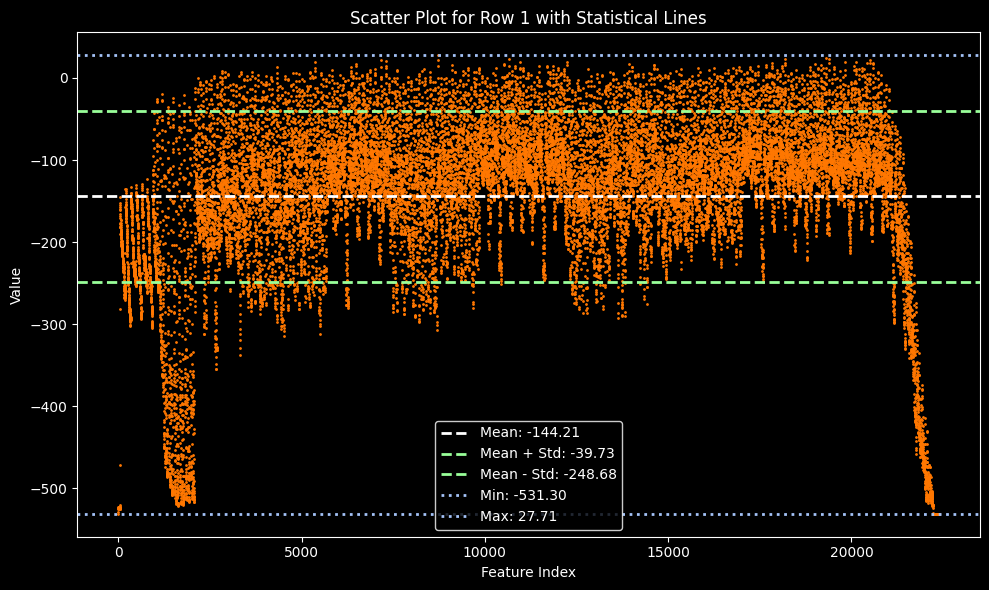

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the MFCC data from '08.csv'
mfcc_data = pd.read_csv('data-v2/08-MFCC.csv', header=None).values

# Select the first row (row 1)
row_1 = mfcc_data[0, :]

# Calculate statistics for row 1
mean_row_1 = np.mean(row_1)
std_row_1 = np.std(row_1)
min_row_1 = np.min(row_1)
max_row_1 = np.max(row_1)

# Set the style to dark background
plt.style.use('dark_background')

# Plotting the scatter plot for row 1
fig, ax = plt.subplots(figsize=(10, 6))

# Plot row 1 with orange color (#ff7700)
ax.scatter(range(len(row_1)), row_1, s=1, color='#ff7700')

# Draw lines for mean, std, min, and max
ax.axhline(mean_row_1, color='#ffffff', linestyle='--', label=f'Mean: {mean_row_1:.2f}', linewidth=2)  # Updated mean color
ax.axhline(mean_row_1 + std_row_1, color='#99ff99', linestyle='--', label=f'Mean + Std: {mean_row_1 + std_row_1:.2f}', linewidth=2)
ax.axhline(mean_row_1 - std_row_1, color='#99ff99', linestyle='--', label=f'Mean - Std: {mean_row_1 - std_row_1:.2f}', linewidth=2)
ax.axhline(min_row_1, color='#a3c2f7', linestyle=':', label=f'Min: {min_row_1:.2f}', linewidth=2)
ax.axhline(max_row_1, color='#a3c2f7', linestyle=':', label=f'Max: {max_row_1:.2f}', linewidth=2)

# Set plot titles and labels
ax.set_title('Scatter Plot for Row 1 with Statistical Lines', color='white')
ax.set_xlabel('Feature Index', color='white')
ax.set_ylabel('Value', color='white')
ax.legend(facecolor='black', edgecolor='white', labelcolor='white')

# Adjust layout for better spacing
plt.tight_layout()

# Save the plot with a high resolution and black background
plt.savefig('Images/features_row_1.png', dpi=300, facecolor='black')

# Show the plot
plt.show()


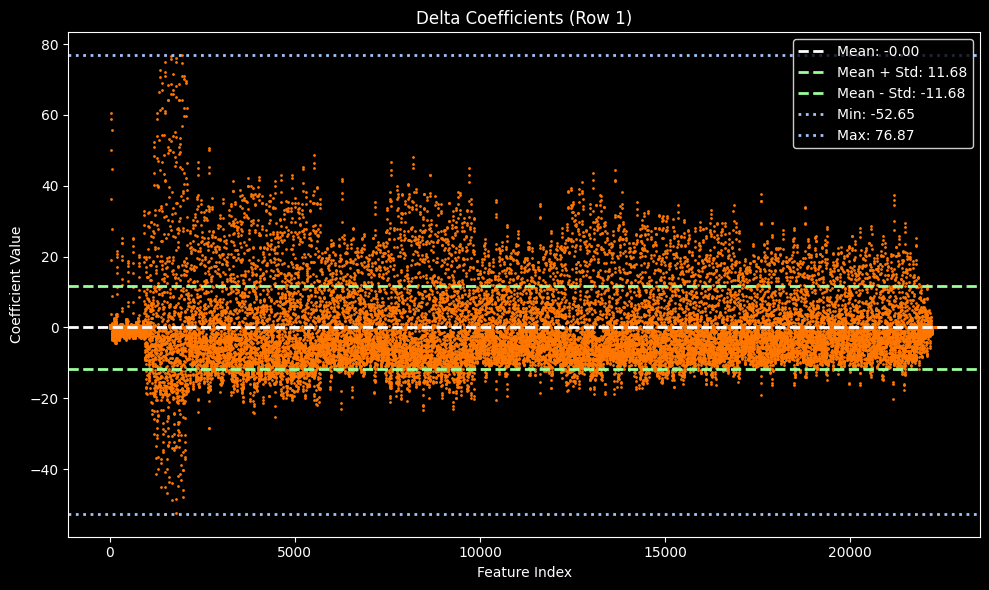

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa

# Load the MFCC data from '08.csv'
mfcc_data = pd.read_csv('data-v2/08-MFCC.csv', header=None).values

# Select the first row (row 1)
row_1 = mfcc_data[0, :]

# Compute delta (first-order difference) feature
delta_row_1 = librosa.feature.delta(row_1.reshape(1, -1))

# Calculate statistics for delta_row_1
mean_row_1 = np.mean(delta_row_1)
std_row_1 = np.std(delta_row_1)
min_row_1 = np.min(delta_row_1)
max_row_1 = np.max(delta_row_1)

# Set the style to dark background
plt.style.use('dark_background')

# Plotting the scatter plot for delta_row_1
fig, ax = plt.subplots(figsize=(10, 6))

# Plot delta coefficients using color #ff7700
ax.scatter(range(len(delta_row_1[0])), delta_row_1[0], s=1, color='#ff7700')

# Draw lines for mean, std, min, and max with pastel colors
ax.axhline(mean_row_1, color='#ffffff', linestyle='--', label=f'Mean: {mean_row_1:.2f}', linewidth=2)  # Updated mean color
ax.axhline(mean_row_1 + std_row_1, color='#99ff99', linestyle='--', label=f'Mean + Std: {mean_row_1 + std_row_1:.2f}', linewidth=2)
ax.axhline(mean_row_1 - std_row_1, color='#99ff99', linestyle='--', label=f'Mean - Std: {mean_row_1 - std_row_1:.2f}', linewidth=2)
ax.axhline(min_row_1, color='#a3c2f7', linestyle=':', label=f'Min: {min_row_1:.2f}', linewidth=2)
ax.axhline(max_row_1, color='#a3c2f7', linestyle=':', label=f'Max: {max_row_1:.2f}', linewidth=2)

# Add labels and title
ax.set_title('Delta Coefficients (Row 1)', color='white')
ax.set_xlabel('Feature Index', color='white')
ax.set_ylabel('Coefficient Value', color='white')

# Add a legend to distinguish the different features
ax.legend(facecolor='black', edgecolor='white', labelcolor='white')

# Adjust layout for better spacing
plt.tight_layout()

# Save the plot with a high resolution and a black background
plt.savefig('Images/delta_row_1.png', dpi=300, facecolor='black')

# Show the plot
plt.show()


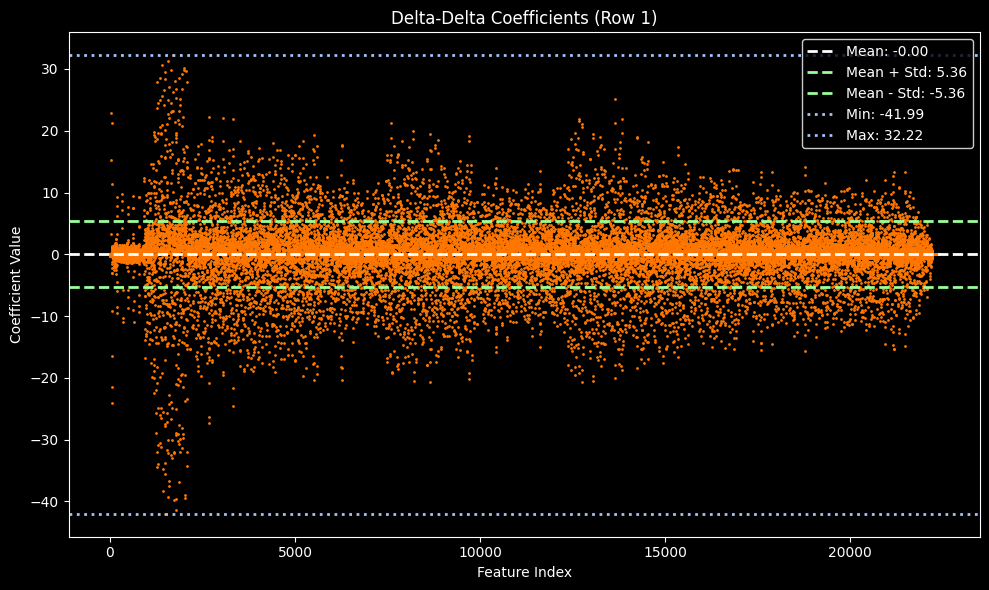

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa

# Load the MFCC data from '08.csv'
mfcc_data = pd.read_csv('data-v2/08-MFCC.csv', header=None).values

# Select the first row (row 1)
row_1 = mfcc_data[0, :]

# Compute delta-delta (second-order difference) feature
delta_row_1 = librosa.feature.delta(row_1.reshape(1, -1), order=2)

# Calculate statistics for delta_row_1
mean_row_1 = np.mean(delta_row_1)
std_row_1 = np.std(delta_row_1)
min_row_1 = np.min(delta_row_1)
max_row_1 = np.max(delta_row_1)

# Set the style to dark background
plt.style.use('dark_background')

# Plotting the scatter plot for delta_row_1
fig, ax = plt.subplots(figsize=(10, 6))

# Plot delta coefficients using color #ff7700
ax.scatter(range(len(delta_row_1[0])), delta_row_1[0], s=1, color='#ff7700')

# Draw lines for mean, std, min, and max with pastel colors
ax.axhline(mean_row_1, color='#ffffff', linestyle='--', label=f'Mean: {mean_row_1:.2f}', linewidth=2)  # Updated mean color
ax.axhline(mean_row_1 + std_row_1, color='#99ff99', linestyle='--', label=f'Mean + Std: {mean_row_1 + std_row_1:.2f}', linewidth=2)
ax.axhline(mean_row_1 - std_row_1, color='#99ff99', linestyle='--', label=f'Mean - Std: {mean_row_1 - std_row_1:.2f}', linewidth=2)
ax.axhline(min_row_1, color='#a3c2f7', linestyle=':', label=f'Min: {min_row_1:.2f}', linewidth=2)
ax.axhline(max_row_1, color='#a3c2f7', linestyle=':', label=f'Max: {max_row_1:.2f}', linewidth=2)

# Add labels and title
ax.set_title('Delta-Delta Coefficients (Row 1)', color='white')
ax.set_xlabel('Feature Index', color='white')
ax.set_ylabel('Coefficient Value', color='white')

# Add a legend to distinguish the different features
ax.legend(facecolor='black', edgecolor='white', labelcolor='white')

# Adjust layout for better spacing
plt.tight_layout()

# Save the plot with a high resolution and a black background
plt.savefig('Images/delta_delta_row_1.png', dpi=300, facecolor='black')

# Show the plot
plt.show()


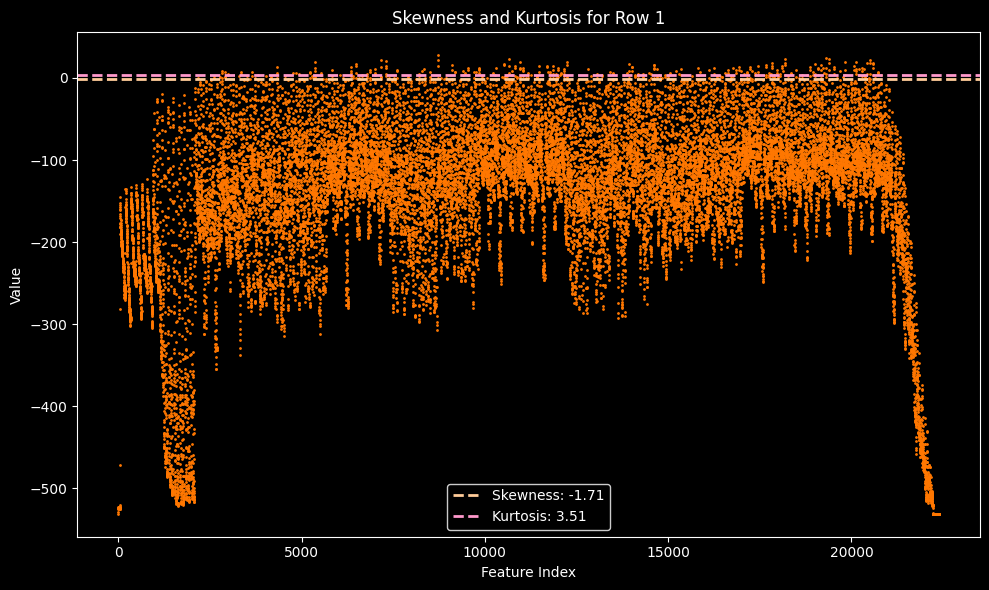

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Load the MFCC data from '08.csv'
mfcc_data = pd.read_csv('data-v2/08-MFCC.csv', header=None).values

# Select the first row (row 1)
row_1 = mfcc_data[0, :]

# Calculate skewness and kurtosis for row 1
skewness_row_1 = skew(row_1)
kurtosis_row_1 = kurtosis(row_1)

# Set the style to dark background
plt.style.use('dark_background')

# Skewness Plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(range(len(row_1)), row_1, s=1, color='#ff7700')

# Draw skewness and kurtosis lines
ax.axhline(skewness_row_1, color='#ffcc99', linestyle='--', label=f'Skewness: {skewness_row_1:.2f}', linewidth=2)
ax.axhline(kurtosis_row_1, color='#ff99cc', linestyle='--', label=f'Kurtosis: {kurtosis_row_1:.2f}', linewidth=2)

# Add titles and labels
ax.set_title(f'Skewness and Kurtosis for Row 1', color='white')
ax.set_xlabel('Feature Index', color='white')
ax.set_ylabel('Value', color='white')
ax.legend(facecolor='black', edgecolor='white', labelcolor='white')

# Adjust layout
plt.tight_layout()

# Save the skewness and kurtosis plot
plt.savefig('Images/skewness_kurtosis_row_1.png', dpi=300, facecolor='black')

# Show the skewness and kurtosis plot
plt.show()
